[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/assignment-2B/blob/master/GoodResult_SDG_3_layers_Relu_3_class.ipynb)

In [1]:
!wget "https://github.com/rajagopalmotivate/assignment-2B/raw/master/data_3class.pkl"


Redirecting output to ‘wget-log.2’.


train
test
(100, 2)


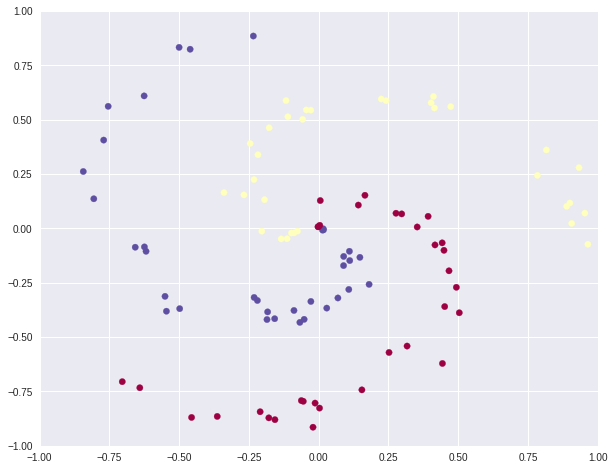

In [2]:
# cross entropy softmax, ReLu

import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# WORKS WELL , two FC layer 

#----
#from datain import *

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)
N = 7500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes


with open('data_3class.pkl', 'rb') as f:
    mydictionary =  pickle.load(f)

for akeyname in mydictionary:
    print (akeyname )

testX, testY = mydictionary["test"]
trainX, trainY = mydictionary["train"]


X = trainX[100:200]  
y = trainY[100:200]

print(X.shape)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()


In [3]:

# initialize parameters randomly
noofneuronsinLayer1 = 200 # size of hidden layer 1
noofneuronsinLayer2 = 120 # size of hidden layer 2
noofneuronsinLayer3 = 30 # size of hidden layer 2

W = 0.01 * np.random.randn(D,noofneuronsinLayer1)
b = np.zeros((1,noofneuronsinLayer1))

W1 = 0.01 * np.random.randn(noofneuronsinLayer1, noofneuronsinLayer2)
b1 = np.zeros((1,noofneuronsinLayer2))

W2 = 0.01 * np.random.randn(noofneuronsinLayer2, noofneuronsinLayer3)
b2 = np.zeros((1,noofneuronsinLayer3))

W3 = 0.01 * np.random.randn(noofneuronsinLayer3,K)
b3 = np.zeros((1,K))


# some hyperparameters
step_size = 1e-1
reg = 1e-5 # regularization strength

num_examples = X.shape[0]
print('num_examples is = ' + str(num_examples))

print('X = ')
#print(X)


print('W = ')
print(W)

print('W1 = ')
print(W1)


print('W3 = ')
print(W3)


myi = 0
for i in range(80000):

    index = myi * 100
    X = trainX[index:index+100]  
    y = trainY[index:index+100]
    myi = myi + 1
    
    if(index + 500 > 22000 ):
      myi = 0
    
    
    # evaluate class scores, [N x K]
    hidden_layer1 = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W1) + b1)  # note, ReLU activation
    hidden_layer3 = np.maximum(0, np.dot(hidden_layer2, W2) + b2)  # note, ReLU activation
    scores3 = np.dot(hidden_layer3, W3) + b3
    scores2 = np.dot(hidden_layer2, W2) + b2
    scores1 = np.dot(hidden_layer1, W1) + b1


    # compute the class probabilities
    exp_scores3 = np.exp(scores3)
    probs3 = exp_scores3 / np.sum(exp_scores3, axis=1, keepdims=True)  # [N x K]

    exp_scores2 = np.exp(scores2)
    probs2 = exp_scores2 / np.sum(exp_scores2, axis=1, keepdims=True)  # [N x K]

    exp_scores1 = np.exp(scores1)
    probs1 = exp_scores1 / np.sum( exp_scores1, axis=1, keepdims=True )

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs3[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2) + 0.5 * reg * np.sum(W3 * W3)
    loss = data_loss + reg_loss

    if i==1:
       # print('hidden_layer = ')
       # print(hidden_layer1)
        print('iteration ,     loss')
    if i % 100 == 0:
        print(loss)



    # compute the gradient on scores3
    dscores3 = probs3
    dscores3[range(num_examples), y] -= 1
    dscores3 /= num_examples

    dscores2 = probs2
    dscores2[range(num_examples), y ] -= 1
    dscores2 /= num_examples

    dscores1 = probs1
    dscores1[range(num_examples), y ] -= 1
    dscores1 /= num_examples

    if i == 0:
        print('hidden_layer1 shape ' + str(hidden_layer1.shape ))
        print('scores3 ' + str(scores3.shape))
        #print('corect_logprobs = ' + str(corect_logprobs))
        print('loss = ' + str(loss))
        print('probs3 ' + str(probs3.shape))
        print('dscores3 ' + str(dscores3.shape))
        print('probs2 ' + str(probs2.shape))
        print('dscores2 ' + str(dscores2.shape))
        print('probs1 ' + str(probs1.shape))
        print('dscores1 ' + str(dscores1.shape))

    # backpropate the gradient to the parameters
    # first backprop into parameters W3 and b3
    dW3 = np.dot(hidden_layer3.T, dscores3)
    db3 = np.sum(dscores3, axis=0, keepdims=True)

    # next backprop into hidden layer
    dhidden3 = np.dot(dscores3, W3.T)
    # backprop the ReLU non-linearity
    dhidden3[hidden_layer3 <= 0] = 0

    dW2 = np.dot(hidden_layer2.T, dscores2)
    db2 = np.sum(dscores2, axis=0, keepdims=True)

    # next backprop into hidden layer
    dhidden2 = np.dot(dscores2, W2.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0

    dW1 = np.dot(hidden_layer1.T, dscores1)
    db1 = np.sum(dscores1, axis=0, keepdims=True)

    dhidden1 = np.dot(dscores1, W1.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0

    # finally into W,b
    dW = np.dot(X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW3 += reg * W3
    dW2 += reg * W2
    dW1 += reg * W1
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3



num_examples is = 100
X = 
W = 
[[ 1.76405235e-02  4.00157208e-03  9.78737984e-03  2.24089320e-02
   1.86755799e-02 -9.77277880e-03  9.50088418e-03 -1.51357208e-03
  -1.03218852e-03  4.10598502e-03  1.44043571e-03  1.45427351e-02
   7.61037725e-03  1.21675016e-03  4.43863233e-03  3.33674327e-03
   1.49407907e-02 -2.05158264e-03  3.13067702e-03 -8.54095739e-03
  -2.55298982e-02  6.53618595e-03  8.64436199e-03 -7.42165020e-03
   2.26975462e-02 -1.45436567e-02  4.57585173e-04 -1.87183850e-03
   1.53277921e-02  1.46935877e-02  1.54947426e-03  3.78162520e-03
  -8.87785748e-03 -1.98079647e-02 -3.47912149e-03  1.56348969e-03
   1.23029068e-02  1.20237985e-02 -3.87326817e-03 -3.02302751e-03
  -1.04855297e-02 -1.42001794e-02 -1.70627019e-02  1.95077540e-02
  -5.09652182e-03 -4.38074302e-03 -1.25279536e-02  7.77490356e-03
  -1.61389785e-02 -2.12740280e-03 -8.95466561e-03  3.86902498e-03
  -5.10805138e-03 -1.18063218e-02 -2.81822283e-04  4.28331871e-03
   6.65172224e-04  3.02471898e-03 -6.3432209

In [0]:

X = trainX 
y = trainY

In [5]:

# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W1) + b1)  # note, ReLU activation
hidden_layer3 = np.maximum(0, np.dot(hidden_layer2, W2) + b2)  # note, ReLU activation
scores3 = np.dot(hidden_layer3, W3) + b3
predicted_class = np.argmax(scores3, axis=1)
print ('Training accuracy = ')
print ((np.mean(predicted_class == y)))



Training accuracy = 
0.9951555555555556


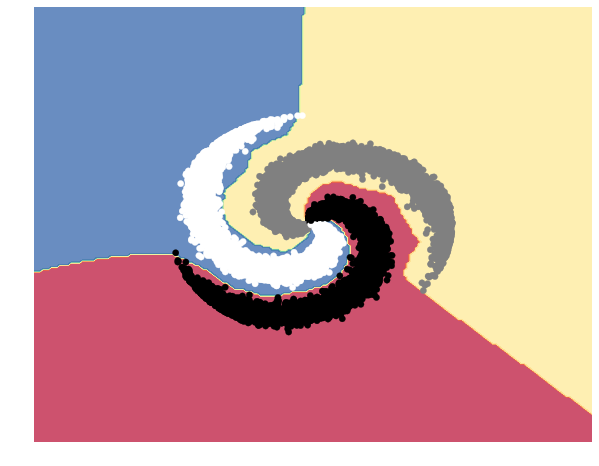

In [17]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

temp1 = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Zbefore = np.dot(np.maximum(0, temp1 ), W1) + b1
Zintermediate = np.dot(np.maximum(0, Zbefore ), W2) + b2
Z = np.dot(np.maximum(0, Zintermediate ), W3) + b3

Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.axis('off')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()